# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import random
from citipy import citipy
import os
from scipy.stats import linregress 

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

## Generate Cities List

In [14]:
# Generate random lat and long values
city_lst = []

# Create random cities lists with lat and long values
for i in range(1500):
    lat_value = np.random.uniform(-90,90)
    long_value = np.random.uniform(-180,180)
    # Use citipy to determine nearest city to random lat and long values and don't duplicate cities
    if citipy.nearest_city(lat_value,long_value).city_name not in city_lst:
        city_lst.append(citipy.nearest_city(lat_value,long_value).city_name)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# # Build partial query URL
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

found_cities = []
long_list = []
lat_lst = []
temp_lst = []
hum_lst = []
cloud_lst = []
wind_lst = []
countries_lst = []
date_lst = []

record_counter = 0
set_counter = 1

print('Beginning Data Retrival')
print('-----------------------')
for cities in city_lst:
    try:
        response = requests.get(query_url + cities).json()
        long_list.append(response['coord']['lon'])
        lat_lst.append(response['coord']['lat'])
        temp_lst.append(response['main']['temp_max'])
        hum_lst.append(response['main']['humidity'])
        cloud_lst.append(response['clouds']['all'])
        wind_lst.append(response['wind']['speed'])
        countries_lst.append(response['sys']['country'])
        date_lst.append(response['dt'])
        
        if record_counter < 50:
            record_counter += 1
            found_cities.append(cities)
        else:
            record_counter = 1
            set_counter += 1
            found_cities.append(cities)
        print(f'Processing Record {record_counter} of Set {set_counter} | {cities}')
        
    except KeyError:
        print('City Not Found. Skipping...')
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrival
-----------------------
Processing Record 1 of Set 1 | hobart
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | isangel
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | souillac
Processing Record 6 of Set 1 | hobyo
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | whitehorse
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | tautira
Processing Record 13 of Set 1 | marzuq
Processing Record 14 of Set 1 | surt
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | luxor
Processing Record 17 of Set 1 | ust-kuyga
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | cody
City Not Found. Skipping...
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | navur
Processing Record 22 of Set 1 | okhotsk
Processing Record 23 of Set 1 | chokurdakh
Proce

Processing Record 41 of Set 4 | luderitz
City Not Found. Skipping...
Processing Record 42 of Set 4 | sisimiut
Processing Record 43 of Set 4 | gordeyevka
Processing Record 44 of Set 4 | dalbandin
Processing Record 45 of Set 4 | acultzingo
City Not Found. Skipping...
Processing Record 46 of Set 4 | shivrajpur
Processing Record 47 of Set 4 | iqaluit
Processing Record 48 of Set 4 | boa vista
Processing Record 49 of Set 4 | dom pedrito
Processing Record 50 of Set 4 | road town
Processing Record 1 of Set 5 | tsabong
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | dandong
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | bloemfontein
Processing Record 7 of Set 5 | sao miguel do araguaia
Processing Record 8 of Set 5 | itarema
Processing Record 9 of Set 5 | bowen
Processing Record 10 of Set 5 | hammerfest
Processing Record 11 of Set 5 | formosa do rio preto
Processing Record 12 of Set 5 | necochea
Processing 

Processing Record 13 of Set 12 | alberton
------------------------------
Data Retrieval Complete
------------------------------


In [16]:
len(found_cities)

563

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
raw_df = pd.DataFrame({'City': found_cities,
                      'Lat': lat_lst,
                      'Lng': long_list,
                      'Max Temp': temp_lst,
                      'Humidity': hum_lst,
                      'Cloudiness': cloud_lst,
                      'Wind Speed': wind_lst,
                      'Country': countries_lst,
                      'Date': date_lst})


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.88,147.33,46.40,61,20,18.34,AU,1600029790
1,port elizabeth,-33.92,25.57,55.40,76,0,10.29,ZA,1600029790
2,isangel,-19.55,169.27,72.95,78,61,15.21,VU,1600029790
3,faanui,-16.48,-151.75,78.26,79,91,11.56,PF,1600029791
4,souillac,-20.52,57.52,71.60,78,75,10.29,MU,1600029791


In [26]:
# Check if any humidity above 100.
raw_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.00000,563.000000,563.000000,5.630000e+02
mean,20.280639,15.000462,67.541350,70.49556,50.134991,7.843783,1.600030e+09
std,32.816780,91.630047,15.298773,21.19662,39.479887,5.210993,6.869216e+01
min,-54.800000,-179.170000,22.680000,1.00000,0.000000,0.450000,1.600030e+09
25%,-6.550000,-68.415000,55.400000,60.00000,4.000000,3.600000,1.600030e+09
50%,23.170000,19.490000,70.700000,75.00000,52.000000,6.620000,1.600030e+09
75%,46.825000,97.175000,78.800000,87.00000,90.000000,11.140000,1.600030e+09
max,78.220000,179.320000,106.050000,100.00000,100.000000,28.860000,1.600030e+09


In [ ]:
output = os.path.join("output_data","raw_data.csv")
raw_df.to_csv(output)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

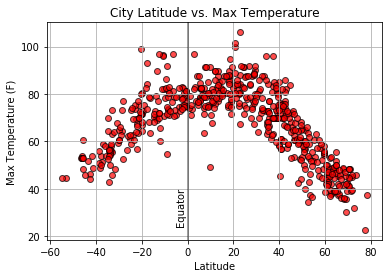

In [106]:
# Generate a scatter plot of max temp vs latitude
plt.scatter(raw_df['Lat'], raw_df['Max Temp'], c ='red' ,edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Add Equator line and text
plt.axvline(0, color = 'black', alpha = .5)
plt.text(-5,25,'Equator',rotation=90)
plt.grid()

# Save figure
plt.savefig(os.path.join('Figures','Lat_vs_Temp.png'))

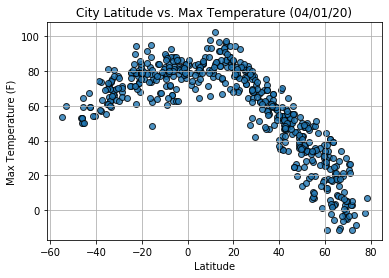

In [10]:
# SAMPLE

## Latitude vs. Humidity Plot

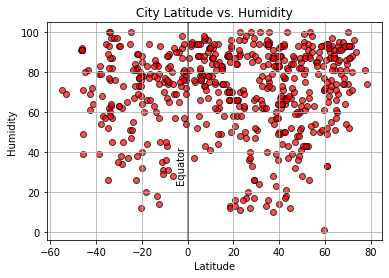

In [107]:
# Generate a scatter plot of max temp vs latitude
plt.scatter(raw_df['Lat'], raw_df['Humidity'], c ='red' ,edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Add Equator line and text
plt.axvline(0, color = 'black', alpha = .5)
plt.text(-5,25,'Equator',rotation=90)
plt.grid()

# Save figure
plt.savefig(os.path.join('Figures','Lat_vs_Humidity.png'))

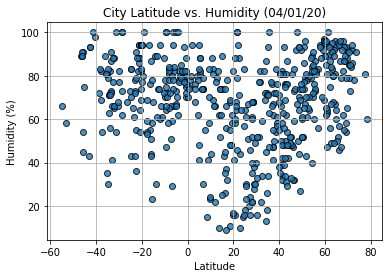

In [11]:
# SAMPLE

## Latitude vs. Cloudiness Plot

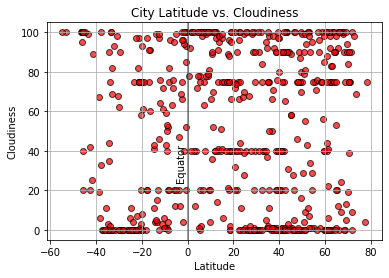

In [110]:
# Generate a scatter plot of max temp vs latitude
plt.scatter(raw_df['Lat'], raw_df['Cloudiness'], c ='red' ,edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Add Equator line and text
plt.axvline(0, color = 'black', alpha = .5)
plt.text(-5,25,'Equator',rotation=90)
plt.grid()

# Save figure
plt.savefig(os.path.join('Figures','Lat_vs_Cloudiness.png'))

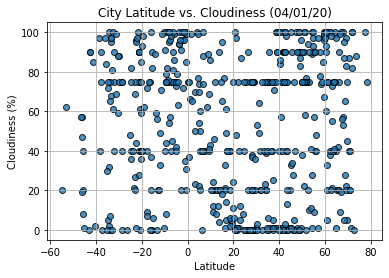

In [12]:
# SAMPLE

## Latitude vs. Wind Speed Plot

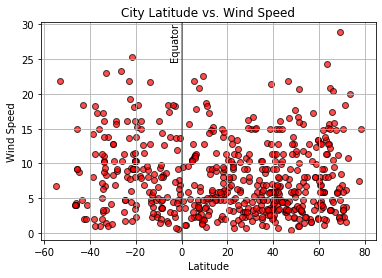

In [109]:
# Generate a scatter plot of max temp vs latitude
plt.scatter(raw_df['Lat'], raw_df['Wind Speed'], c ='red' ,edgecolor='black', alpha=0.7)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Add Equator line and text
plt.axvline(0, color = 'black', alpha = .5)
plt.text(-5,25,'Equator',rotation=90)
plt.grid()

# Save figure
plt.savefig(os.path.join('Figures','Lat_vs_Wind Speed.png'))

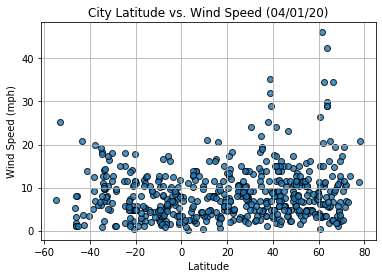

In [13]:
# SAMPLE

## Linear Regression

The r-squared is: 0.683


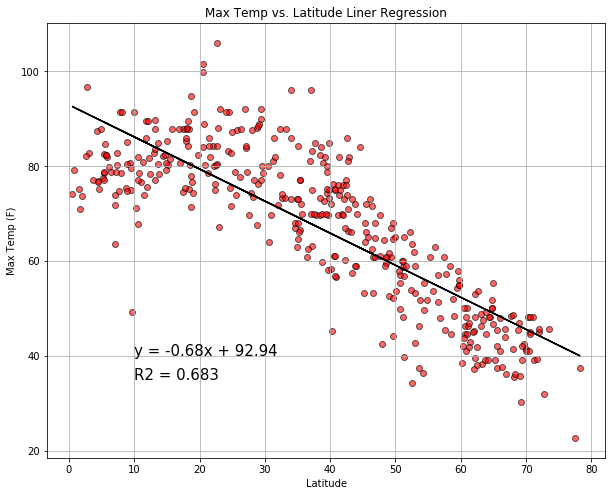

In [99]:
# Define x and y values
xnorth_values = raw_df.loc[raw_df['Lat'] >= 0]['Lat']
xsouth_values = raw_df.loc[raw_df['Lat'] <= 0]['Lat']

ynorth_values = raw_df.loc[raw_df['Lat'] >= 0]['Max Temp']
ysouth_values = raw_df.loc[raw_df['Lat'] <= 0]['Max Temp']

# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xnorth_values, ynorth_values)
regression_values = xnorth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xnorth_values, ynorth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xnorth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (10,40), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (10,35), fontsize=15, color="black")

# Titles and Labels
plt.title('North Hemisphere: Max Temp vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

The r-squared is: 0.615


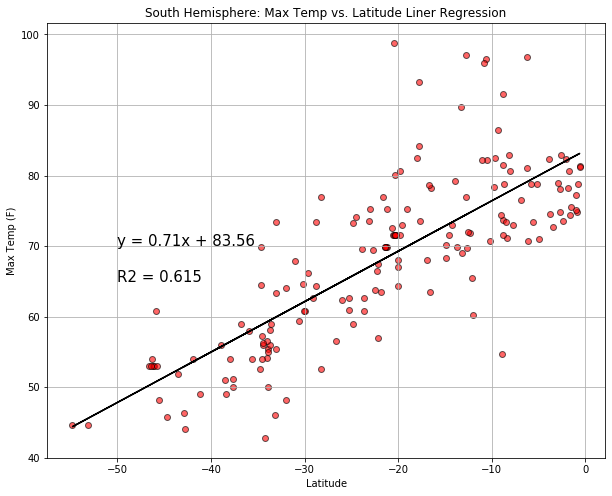

In [102]:
# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xsouth_values, ysouth_values)
regression_values = xsouth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xsouth_values, ysouth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xsouth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (-50,70), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (-50,65), fontsize=15, color="black")

# Titles and Labels
plt.title('South Hemisphere: Max Temp vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


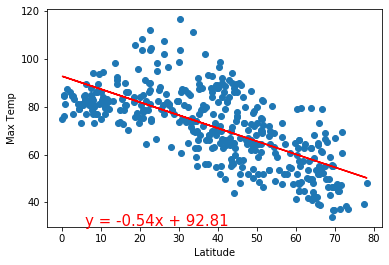

In [25]:
# SAMPLE

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


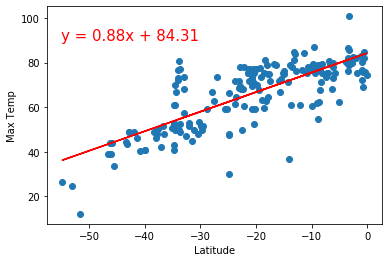

In [26]:
# SAMPLE

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001


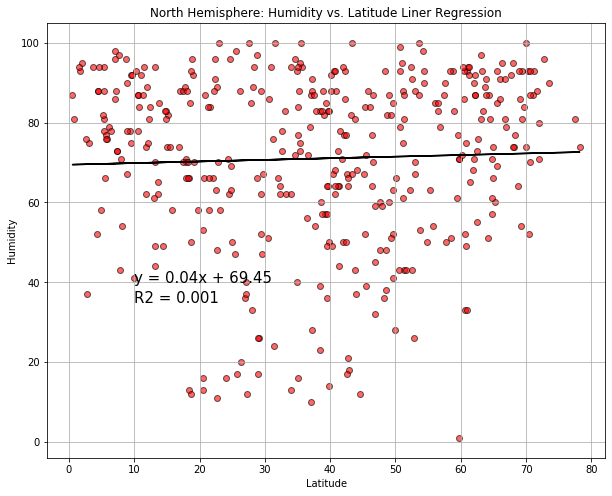

In [104]:
# Define x and y values
ynorth_values = raw_df.loc[raw_df['Lat'] >= 0]['Humidity']
ysouth_values = raw_df.loc[raw_df['Lat'] <= 0]['Humidity']

# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xnorth_values, ynorth_values)
regression_values = xnorth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xnorth_values, ynorth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xnorth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (10,40), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (10,35), fontsize=15, color="black")

# Titles and Labels
plt.title('North Hemisphere: Humidity vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

The r-squared is: 0.007


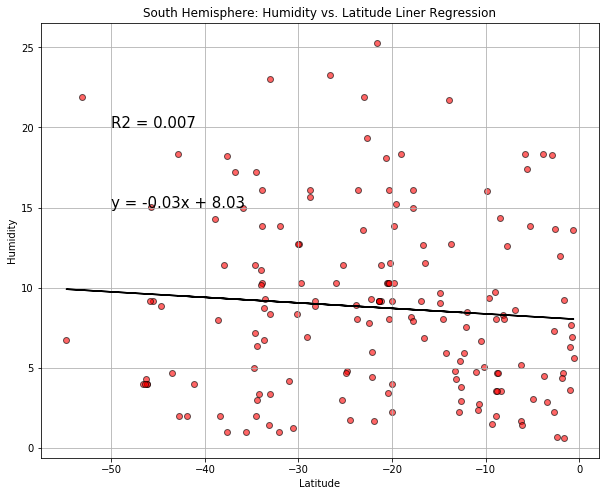

In [128]:
# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xsouth_values, ysouth_values)
regression_values = xsouth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xsouth_values, ysouth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xsouth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (-50,15), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (-50,20), fontsize=15, color="black")

# Titles and Labels
plt.title('South Hemisphere: Humidity vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

The r-value is: 0.000543987878808455


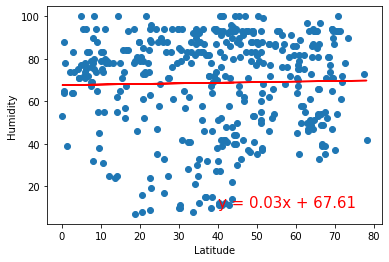

In [27]:
# SAMPLE

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


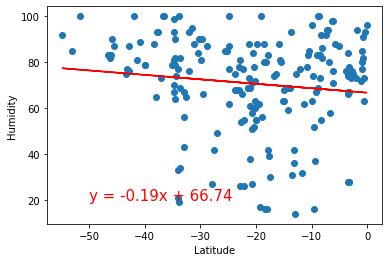

In [28]:
# SAMPLE

The r-squared is: 0.008


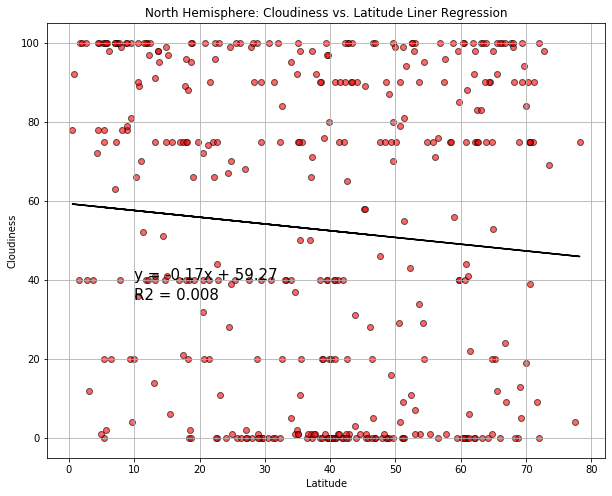

In [116]:
# Define x and y values
ynorth_values = raw_df.loc[raw_df['Lat'] >= 0]['Cloudiness']
ysouth_values = raw_df.loc[raw_df['Lat'] <= 0]['Cloudiness']

# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xnorth_values, ynorth_values)
regression_values = xnorth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xnorth_values, ynorth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xnorth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (10,40), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (10,35), fontsize=15, color="black")

# Titles and Labels
plt.title('North Hemisphere: Cloudiness vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002


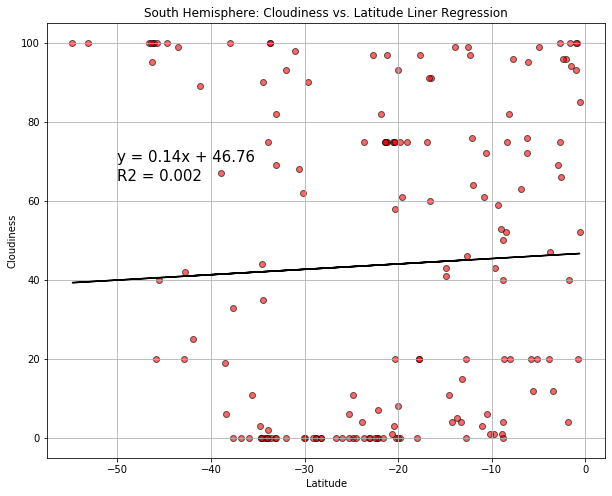

In [117]:
# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xsouth_values, ysouth_values)
regression_values = xsouth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xsouth_values, ysouth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xsouth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (-50,70), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (-50,65), fontsize=15, color="black")

# Titles and Labels
plt.title('South Hemisphere: Cloudiness vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

The r-value is: 0.0020898727664228514


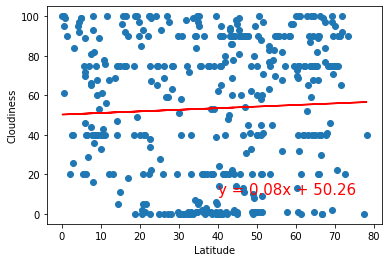

In [29]:
# SAMPLE

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


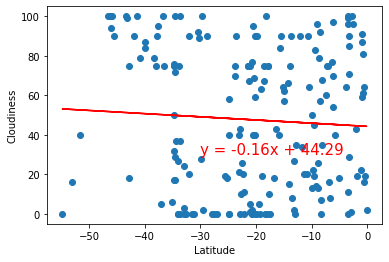

In [30]:
# SAMPLE

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.005


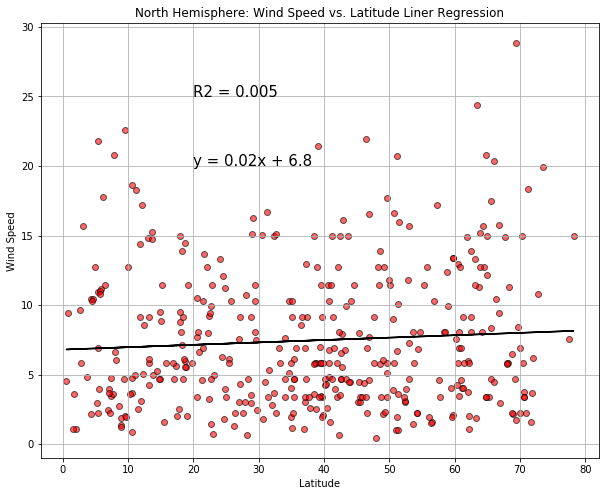

In [126]:
# Define x and y values
ynorth_values = raw_df.loc[raw_df['Lat'] >= 0]['Wind Speed']
ysouth_values = raw_df.loc[raw_df['Lat'] <= 0]['Wind Speed']

# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xnorth_values, ynorth_values)
regression_values = xnorth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xnorth_values, ynorth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xnorth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (20,20), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (20,25), fontsize=15, color="black")

# Titles and Labels
plt.title('North Hemisphere: Wind Speed vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

The r-squared is: 0.007


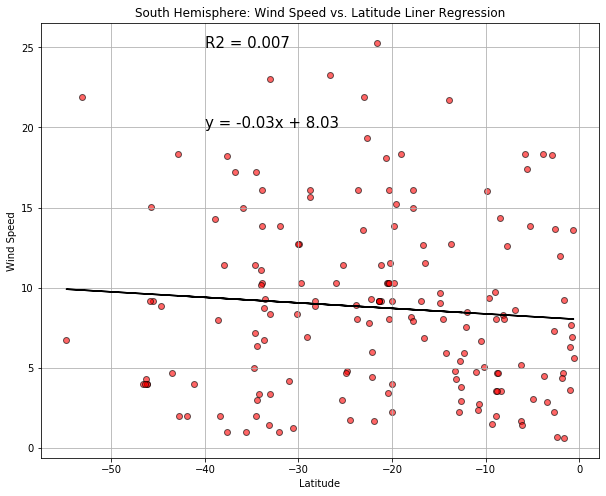

In [125]:
# Creat line regression
slope, intercept, rvalue, pvalue, stderr = linregress(xsouth_values, ysouth_values)
regression_values = xsouth_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot line graph with correlation and regression.
plt.figure(figsize=(10,8))
plt.scatter(xsouth_values, ysouth_values, c = 'red', edgecolor = 'black', alpha = 0.6)
# Plot linear regression line
plt.plot(xsouth_values, regression_values, "black")
# Add equation and R2 value
plt.annotate(line_eq, (-40,20), fontsize=15, color="black")
plt.annotate(f'R2 = {round(rvalue**2,3)}', (-40,25), fontsize=15, color="black")

# Titles and Labels
plt.title('South Hemisphere: Wind Speed vs. Latitude Liner Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

print(f"The r-squared is: {round(rvalue**2,3)}")

The r-value is: 0.04019723576144484


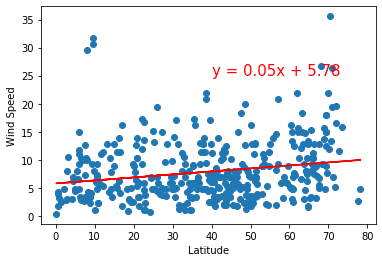

In [31]:
# SAMPLE

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


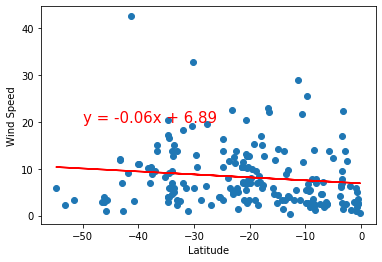

In [32]:
# SAMPLE